<a href="https://colab.research.google.com/github/jbtte/data_science_Enap/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação do Dataset
Este dataset é publicado anuamento pelo Conselho Nacional de Justiça - CNJ.
Trata-se da principal fonte de dados estatísticas oficiais do Poder Judiciário. Os dados brutos são acessiveis pelo site do próprio CNJ que juntamente com a disponibilização dos dados, publica o Relatório Justiça em Números, que busca divulgar a realidade dos tribunais brasileiros.
O objetivo do CNJ ao publicar estes dados é detalhar a estrutura e litigiosidade dos tribunais, além de fornecer os indicadores e as análises essenciais para subsidiar a Gestão Judiciária brasileira.

O presente projeto utilizou os dados publicados em 2020, contendo informações de 2009 a 2019 de todos os tribunais brasileiros (exceto o Supremo Tribunal Federal). As colunas referem-se aos mais variados dados, referentes à atividade judicária fim, como por exemplo, casos novos, acervo; quanto a parte administrtiva e orçamentária há informações sobre gastos totais, número de servidores, localização; e também, dados referentes à economia local, por exemplo o PIB.

##Link para Download do Dataset
https://www.cnj.jus.br/pesquisas-judiciarias/justica-em-numeros/base-de-dados/
___

# Motivação Pessoal
Sou servidor público da área judiciária e atualmente estou lotado no Tribunal de Justiça do Distrito Federal. 

Existe uma grande pressão da sociedade quanto ao custo da Justiça e sua aparente ineficiência, conforme se observa deste artigo publicado pela Gazeta do Povo (https://www.gazetadopovo.com.br/ideias/por-que-o-judiciario-brasileiro-e-tao-caro-e-lento/) e esse publicado pela Revista Super Interessante (https://super.abril.com.br/sociedade/a-insustentavel-lerdeza-do-nosso-judiciario/). Os dados utilizados nessas reportagens são corroborados por outras fontes (http://www.adambrasil.com/wp-content/uploads/2017/09/newsletter_observatorio_v.2_n.9.pdf) e indicam que o Judicário brasileiro gasta 1,3% do PIB com o Poder Judiciário, o que é um valor muito acima dos demais países ocidentais (Espanha - 0,12%; Argentina - 0.13%, Estados Unidos - 0,14%; Colombia - 0,21%, Chile - 0,22%, Alemanha - 0,32%).

O presente estudo, portanto, visa identificar qual o custo para o Estado da tramitação de um processo judicial – dado obtido dividindo o total da despesa do Tribunal de Justiça pelo acervo de processos em tramitação – e comparar este valor entre os 27 Tribunais estaduais que existem no Brasil.
Em seguida, realizar um recorte vertical e analisar o Tribunal de Justiça do Distrito Federal mais a fundo para identificar quais os fatores que têm contribuido para o valor do processo estar no patamar que se encontra.
___

#Investigação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style="darkgrid")

Após criar o dataset, cria-se mais dois dataframe um somente para os tribunais de justiça estaduais e um para a soma de todos os tribunais estaduais.

In [2]:
cnj_db_path = 'https://github.com/jbtte/data_science_Enap/blob/main/JN_25-Ago-2020.xlsx?raw=true'
df_total = pd.read_excel(cnj_db_path, na_values="nd", )
df_total['dpp'] = df_total.dpj/df_total.tram
df = df_total[(df_total['justica'] == 'Estadual') & (df_total.sigla!="TJ")]
df_justica = df_total[df_total.sigla=="TJ"]

## Gastos com a Justiça dobram e o custo por processo duplica em 10 anos

Nesse primeiro gráfico, traçamos o total de gastos dos tribunais (linha azul), que deixa claro que em 10 anos os gastos mais que triplicaram, passando de pouco mais de 20 milhões de reais para pouco menos de 60 milhões de reais.

A princípio, essa informação poderia ser justificada pelo aumento de processos, contudo, ao dividirmos o custo total pelo número de processos, observa-se, no grafico Gasto por Processo (linha vermelha) que houve significativo aumento do custo por processo, quase que dobrando o valor na década em estudo.

[Text(0, 0.5, 'R$'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Gasto por Processo - Tribunais Estaduais')]

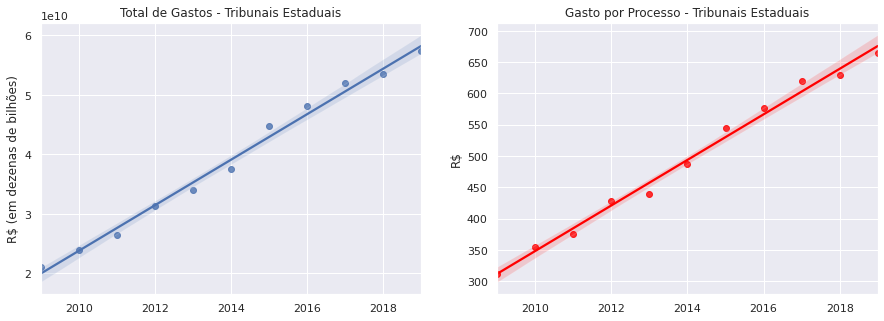

In [3]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
total = sn.regplot(y=df_justica['dpj'], x = df_justica['ano'], ax=ax1)
dpp = sn.regplot(y=df_justica['dpp'], x = df_justica['ano'], color='red', ax=ax2)

total.set(ylabel='R$ (em dezenas de bilhões)', xlabel='', title='Total de Gastos - Tribunais Estaduais')
dpp.set(ylabel='R$', xlabel='', title='Gasto por Processo - Tribunais Estaduais')

## Realidade da maioria dos Estados não é de expressivo aumento
Buscando entender como o custo do processo ocorre em cada tribunal estadual, para confirmar a tendência acima identificada, elaborou-se o gráfico de gasto por processo de todos os tribunais. 

E, de forma, supreendente *não* se constata um reflexo do aumento encontrado na análise global. Em média houve aumento do custo do processo, mas muito inferior a tendência previamente observada. 
As exceções são do TJMA em que houve redução do custo (linha verde) e do TJAP, TJDFT, TJRR e TJTO em que houve significativo aumento (linhas vermelhas).

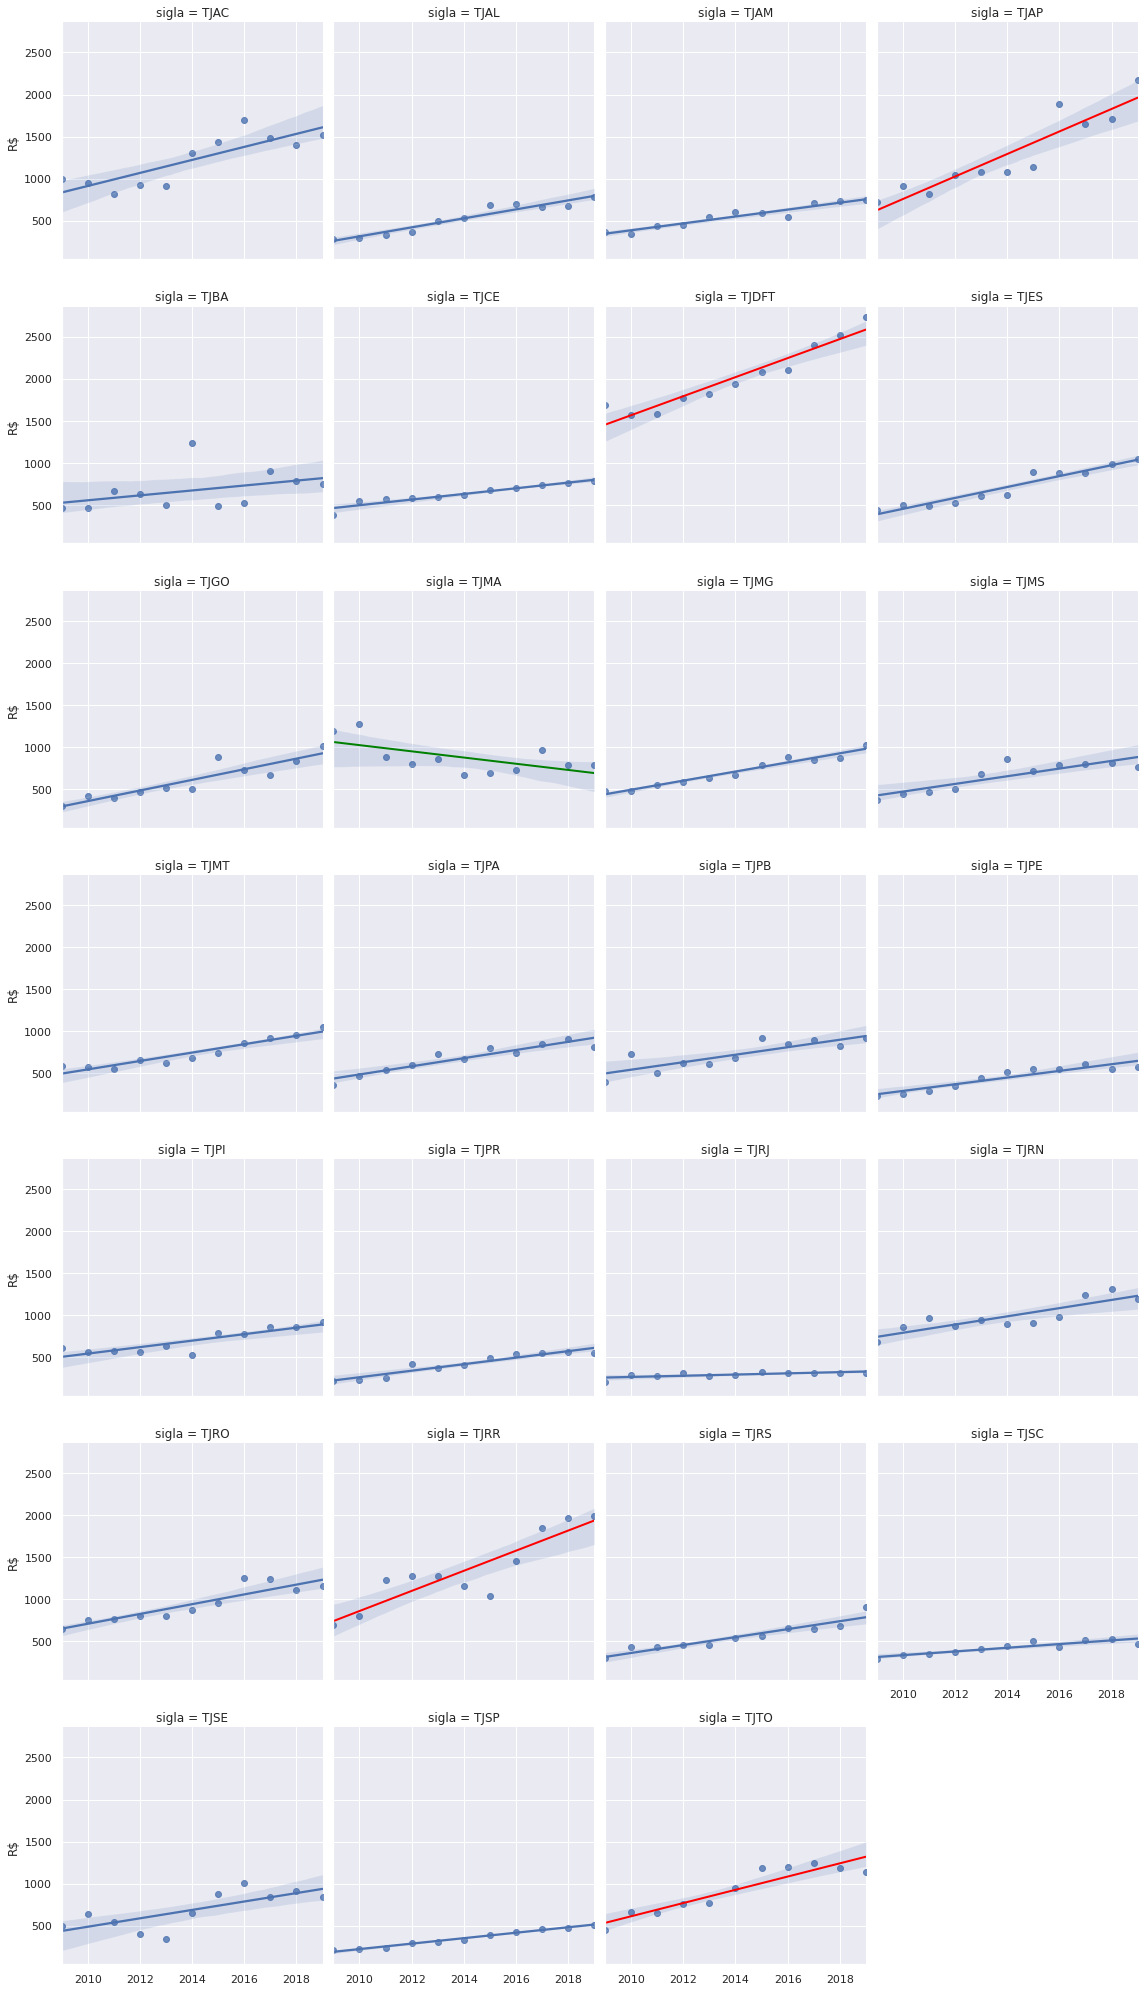

In [4]:
g = sn.FacetGrid(df, col="sigla", height=4, col_wrap=4)
g_reg = g.map(sn.regplot, 'ano', "dpp")

g_reg.set_ylabels('R$')
g_reg.set_axis_labels('')
# customize subplot
ax1 = g.facet_axis(9,9) # could also do ax=g.axes[0,0]
temp = ax1.get_lines()[0]# get the relevant Line2D object (in this case there is only one, but there could be more if using hues)
temp.set_linewidth(2)
temp.set_color('green')

for each in [3, 6, 21, 26]:
  ax1 = g.facet_axis(each,each) # could also do ax=g.axes[0,0]
  line = ax1.get_lines()[0]# get the relevant Line2D object (in this case there is only one, but there could be more if using hues)
  line.set_linewidth(2)
  line.set_color('red')
  

## TJDFT teve um salto no custo do processo
Traçando os gráficos de gastos geral e gasto por processo para o Tribunal de Justiça do Distrito Federal e dos Territórios, constata-se que a tendência global é mantida, tendo os custos totais (linha azul) quase triplicado e os gastos por processo (vermelho) quase que duplicados.

Além disso, o que chama mais a atenção, contudo, é o valor inicial e final do gasto por processo (linha vermelha), que se mostra bem acima dos valores encontrados no gráfico nacional. 


[Text(0, 0.5, 'R$')]

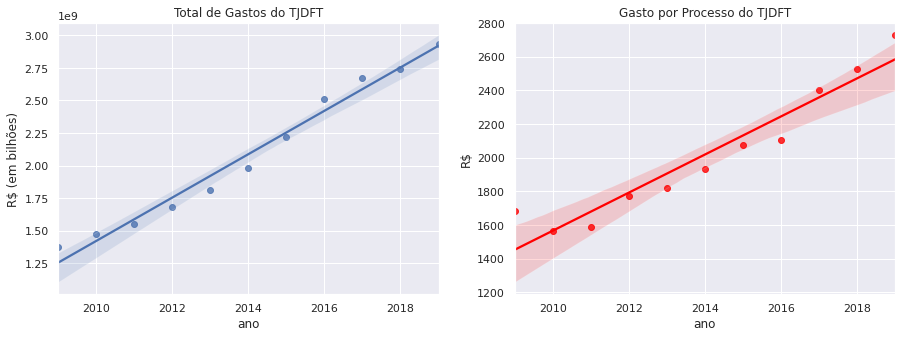

In [5]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
total = sn.regplot(y=df['dpj'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax1)
dpp = sn.regplot(y=df['dpp'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], color='red', ax=ax2)

total.set_title('Total de Gastos do TJDFT')
dpp.set_title('Gasto por Processo do TJDFT')
total.set(ylabel='R$ (em bilhões)')
dpp.set(ylabel='R$')

## TJDFT possui custo por processo consideravelmente acima da média
Buscando os dados brutos, verifica-se que a diferença entre a média do valor por processo nacional (R\$1.016,65) é menos da metade do preço médio no TJDFT (R\$2.729,62)

A discrepância fica em evidência quando se traça o gráfico box, demonstrando que não apenas a média nacional é bem mais baixa, como os diversos tribunais possuem gasto semelhante e o Tribunal de Justiça do Distrito Federal é um outlier, mais de 5 desvio padrões da média

[Text(0.5, 0, 'R$')]

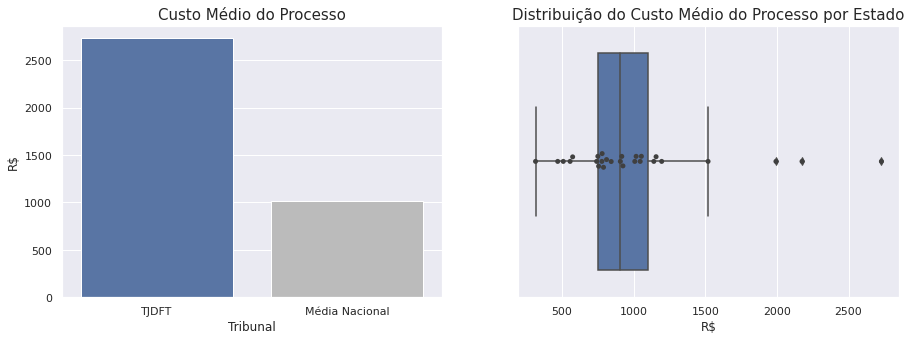

In [6]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Gráfico de média - barplot
national_mean = np.mean(df[(df.ano == 2019)]['dpp'])
tjdf_mean = float(df[(df.sigla == "TJDFT") & (df.ano == 2019)]['dpp'])
media = [["TJDFT", tjdf_mean], ["Média Nacional", national_mean]]
df_media = pd.DataFrame(media, columns=['Tribunal', '2019'])
g = sn.barplot(data=df_media, x='Tribunal', y='2019', palette = ["#4c72b0", "#bbbbbb"],ax=ax1)
g.set(ylabel='R$')
g.set_title('Custo Médio do Processo', size=15)

# Gráfico da distribuição - boxplot
g1 = sn.boxplot(x=df[(df.ano == 2019)]['dpp'], ax=ax2)
sn.swarmplot(x=df[(df.ano == 2019)]['dpp'], color=".25")
g1.set_title('Distribuição do Custo Médio do Processo por Estado', size=15)
g1.set(xlabel='R$')

## Gastos com Recursos Humanos é o responsável por boa parte da culpa
Destrinchando os gastos do TJDFT, constata-se que as despesas com pessoal é a mais elevada e tem crescido, ao passo que as demais despesas têm permanecido constantes.

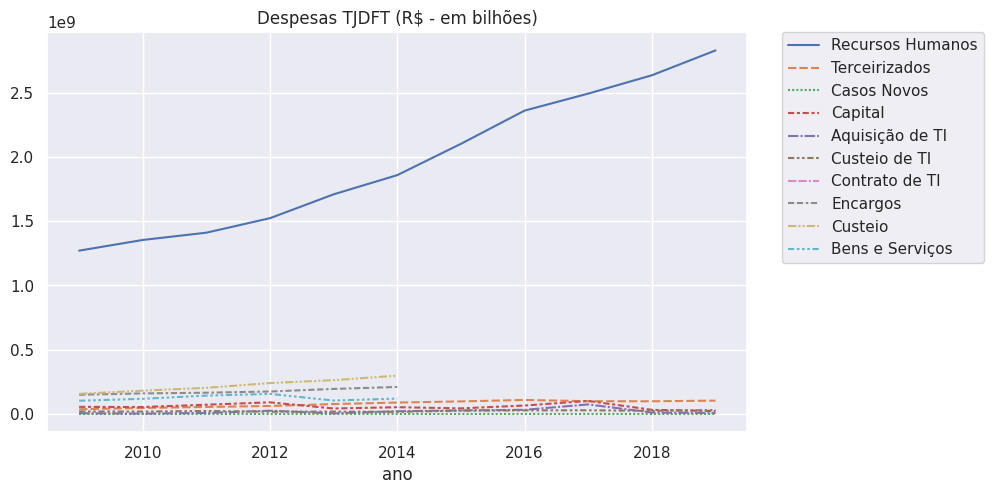

In [7]:
fig, ax = plt.subplots(figsize=(7, 4), frameon=True, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()

despesas = ['drh', 'dter', 'dpcn', 'dk', 'dinf1','dinf2','dinf3', 'denc', 'dct', 'dbs', 'ano']
df_test = df[despesas][df.sigla == "TJDFT"]
df_test = df_test.set_index('ano')
g3 = sn.lineplot(data=df_test).set_title("Despesas TJDFT (R$ - em bilhões)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           labels=['Recursos Humanos', 'Terceirizados', 'Casos Novos', 'Capital', 
                   'Aquisição de TI', 'Custeio de TI', 'Contrato de TI', 'Encargos', 
                   'Custeio', 'Bens e Serviços'])

## TJDFT tem gastos com pessoal desproporcionalmente acima da média
Identificado que as despesas com pessoal é o principal gasto incorrido pelo TJDFT, volta-se para os dados de todos os tribunais de justiça estadual para se comparar o valor gasto com pessoal para o ano de 2019.

Novamente é possível verificar que a média nacional é muito inferior a observada no TJDFT, que é um outlier, de novo bastante distante da média. Na verdade, a distância interquartil é bem pequena, indicando que há um padrão de gasto com recursos humanos em todos os tribunais. 

Text(0.5, 1.0, 'Distribuição do Gasto dos Tribunais com Recursos Humanos')

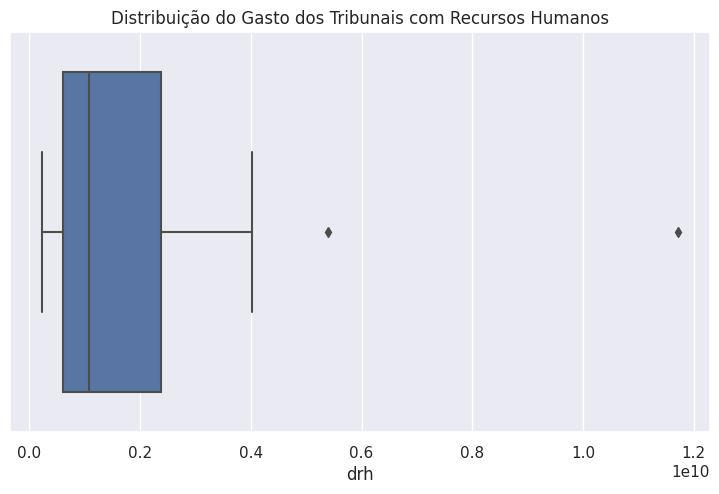

In [8]:
fig, ax = plt.subplots(figsize=(7, 4), frameon=False, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()

g3 = sn.boxplot(x=df[(df.ano == 2019)]['drh'])
g3.set_title('Distribuição do Gasto dos Tribunais com Recursos Humanos')

## O aumento do número de servidores não explica o aumento do gasto por processo

Investigando mais a fundo os gastos com RH aptos a justificar o aumento identificado. Plota-se o gráfico do número de servidores do TJDFT (em azul) e do gasto médio do processo (vermelho). 

Em que pese haver um aumento tanto do número de servidores como do gasto médio, as curvas não têm correlação evidente. Isso fica claro no período pós 2017 em que houve a redução do número de servidores, tendência não acompanhada pelo gasto médio do processo.

De igual forma, cosntata-se no gráfico comparando o número de magistrados e o gasto médio por processo que apesar do aumento dos magistrados (em azul), as curvas não têm correlação. Havendo momentos de expansão (até 2013) e retração (de 2013 até 2015) do número de magistrados ao passo que o gasto médio por processo teve aumento relativamente constante.

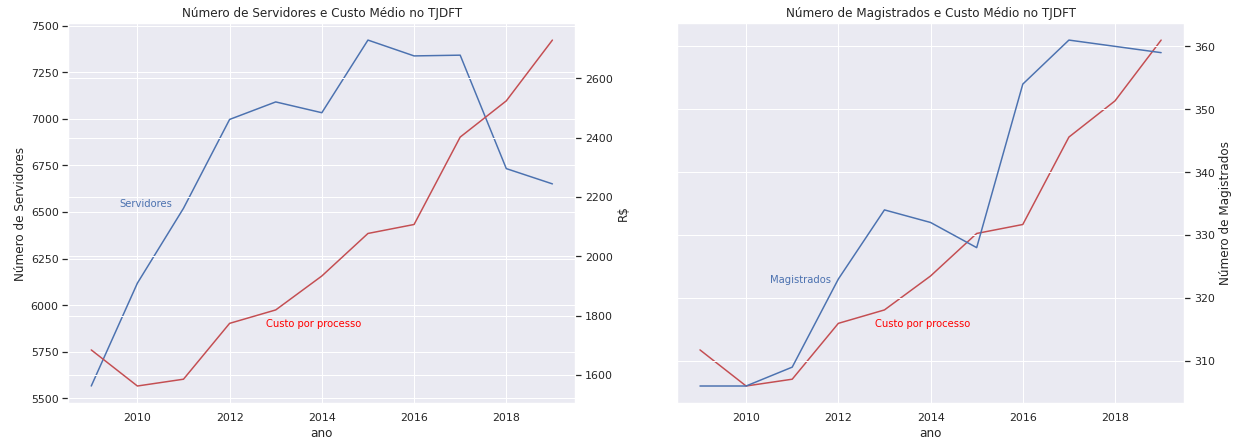

In [9]:
fig, ((ax1, ax3)) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

# Número de servidores
g4 = sn.lineplot(y=df['serv'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax1)
g4.set_title('Número de Servidores e Custo Médio no TJDFT')
g4.set(ylabel='Número de Servidores')
ax2 = ax1.twinx()
g5 = sn.lineplot(x=df['ano'][df.sigla == "TJDFT"], y=df['dpp'][df.sigla == "TJDFT"], ax=ax2, color='r')
g5.set(ylabel='R$')
g4.text(0.17, 0.6, 'Servidores', transform=ax.transAxes, color="#4c72b0")
g5.text(0.38, 0.3, 'Custo por processo', transform=ax.transAxes, color="red")

# Número de magistrados
g7 = sn.lineplot(x=df['ano'][df.sigla == "TJDFT"], y=df['dpp'][df.sigla == "TJDFT"], ax=ax3, color='r')
ax4 = ax3.twinx()
g6 = sn.lineplot(y=df['mag'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax4)
g6.set_title('Número de Magistrados e Custo Médio no TJDFT')
g6.set(ylabel='Número de Magistrados')
g7.set(ylabel='')
g6.text(1.1, 0.41, 'Magistrados', transform=ax.transAxes, color="#4c72b0")
g7.text(1.25, 0.3, 'Custo por processo', transform=ax.transAxes, color="red")

y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)


## Número de processos tramitando tem maior correlação com os gasto por processo

Ainda que intuitivamente haja uma correlação entre o número de processo tramitando e o seu custo, considerando que haveria gastos fixos que aumentam após certo limiar, como por exemplo, mais área de armazenagem.

A relação observada não corresponde ao esperado, sendo possível identificar oscilação a partir de 2015 que não é refletida no custo médio do processo.

Text(0.25, 0.05, 'Custo por processo')

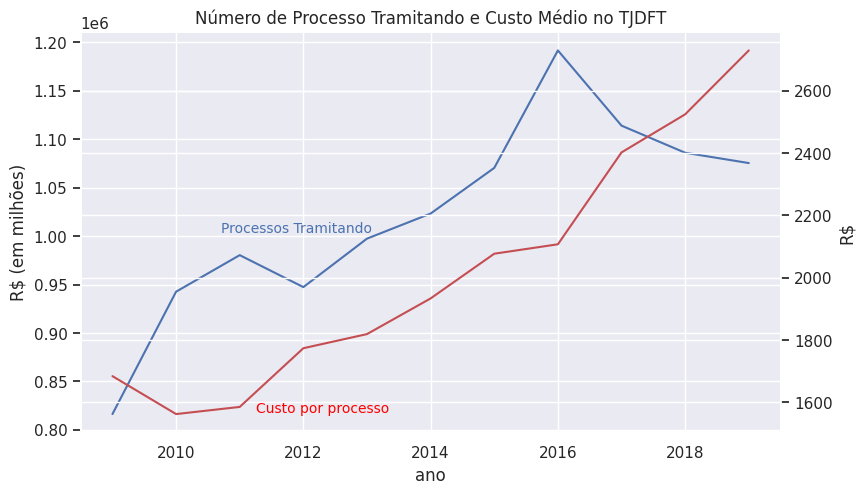

In [10]:
fig, ax = plt.subplots(figsize=(7, 4), frameon=False, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()

g8 = sn.lineplot(y=df['tram'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax)
ax2 = ax.twinx()
g9 = sn.lineplot(x=df['ano'][df.sigla == "TJDFT"], y=df['dpp'][df.sigla == "TJDFT"], ax=ax2, color='r')
g8.set_title('Número de Processo Tramitando e Custo Médio no TJDFT')

g8.set(ylabel='R$ (em milhões)')
g9.set(ylabel='R$')

g8.text(0.2, 0.5, 'Processos Tramitando', transform=ax.transAxes, color="#4c72b0")
g9.text(0.25, 0.05, 'Custo por processo', transform=ax.transAxes, color="red")

## Despesas com pessoal e encargos responde de forma mais direta pelo aumento do custo médio do processo

A comparação entre as despesas com pessoal e encargos tem aumentando de forma diretamente proporcional ao aumento do custo médio, em uma relação de quase 1 para 1.

A mesma relação de quase 1 para 1 é encontrada quando analisamos as despesas com a remuneração de magistrados e o custo médio do processo

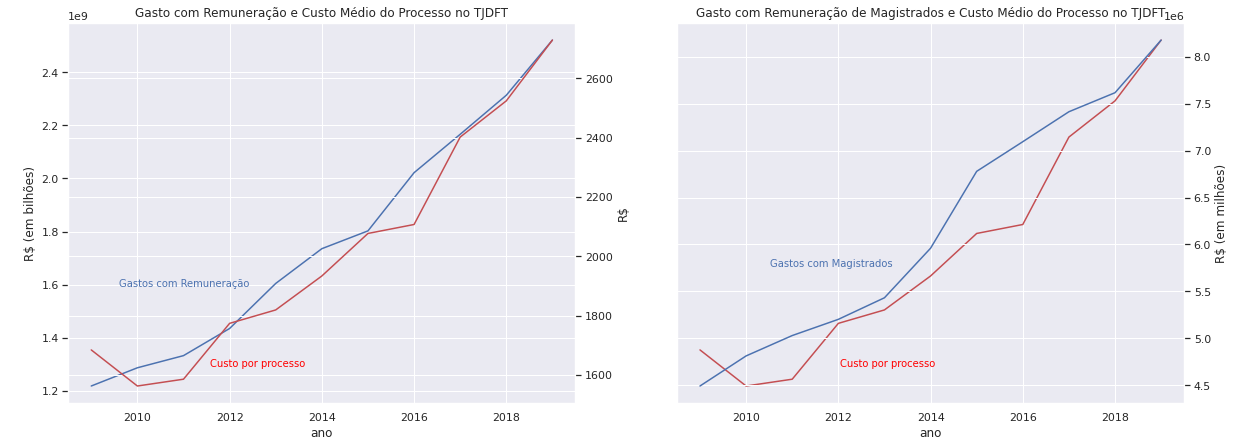

In [11]:
fig, ((ax1, ax3)) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

# Remuneração de servidores
g10 = sn.lineplot(y=df['dpe'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax1)
ax2 = ax1.twinx()
g11 = sn.lineplot(x=df['ano'][df.sigla == "TJDFT"], y=df['dpp'][df.sigla == "TJDFT"], ax=ax2, color='r')
g10.set_title('Gasto com Remuneração e Custo Médio do Processo no TJDFT')

g10.set(ylabel='R$ (em bilhões)')
g11.set(ylabel='R$')

g10.text(0.17, 0.4, 'Gastos com Remuneração', transform=ax.transAxes, color="#4c72b0")
g11.text(0.3, 0.2, 'Custo por processo', transform=ax.transAxes, color="red")

# Remuneração de magistrados

g13 = sn.lineplot(x=df['ano'][df.sigla == "TJDFT"], y=df['dpp'][df.sigla == "TJDFT"], ax=ax3, color='r')
ax4 = ax3.twinx()
g12 = sn.lineplot(y=df['dpmag'][df.sigla == "TJDFT"], x = df['ano'][df.sigla == "TJDFT"], ax=ax4)
g12.set_title('Gasto com Remuneração de Magistrados e Custo Médio do Processo no TJDFT')

g12.set(ylabel='R$ (em milhões)')
g13.set(ylabel='')

g12.text(1.1, 0.45, 'Gastos com Magistrados', transform=ax.transAxes, color="#4c72b0")
g13.text(1.2, 0.2, 'Custo por processo', transform=ax.transAxes, color="red")

y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)

---

### Conclusões e Achados

Da análise dos dados, observa-se que de uma maneira global o judiciário brasileiro vem gastando mais por processo ao longo dos anos, afastando a hipótese de que a adoção do processo judicial eletrônico teria reduzido o custo. Dessa maneira, a análise passou a ser exploratória, buscando identificar as causas desse constante aumento.

Constatou-se que o TJDFT está incorrendo em gastos muito maiores que os demais tribunais estaduais da Federação. O custo médio por processo do Tribunal de Justiça do Distrito Federal e dos Territórios é duas vezes maior que a média nacional.

Aprofundando-se nos gastos efetivamente incorridos pelo TJDFT é possível perceber que os valores gastos com recursos humanos tem significativo impacto no gasto total do tribunal e estes vêm aumento de forma mais acentuada que os demais gastos.

O número de servidores e o número de magistrados não respondem perfeitamente ao aumento do custo médio do processo, contudo ao se comparar o gasto com proventos pagos, tanto aos servidores como aos magistrados, encontra-se quase que uma perfeita correspondência com o aumento do custo médio do processo.
É possível inferir que os demais tribunais estaduais estejam cumprindo sua função constitucional de maneira mais econômica do que o Tribunal de Justiça do Distrito Federal e dos Territórios, ao menos desse ponto de vista meramente quantitativo, deixando evidente uma ineficiência.

Cumpre apontar, contudo que a análise realizada restringiu-se aos tribunais estaduais e, nesse sentido, o TJDFT encontra-se em posição *sui generis* por ser considerado um tribunal de competência estadual, mas estar inserido na esfera federal. Dessa maneira, estudos mais aprofundados comparando os gastos do TJDFT com os demais tribunais federais e o custo médio por processo desses tribunais são necessários.